# https://www.kaggle.com/c/digit-recognizer/
# Score: 0.968, number: 1926

In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras import models, layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [33]:
# load csv files to numpy arrays

def load_data():
    train = pd.read_csv("train.csv")
    print(train.shape)
    X_train = train.values[:,1:] 
    y_train = train.values[:,0]
    
    
    Pred_test = pd.read_csv("test.csv").values
    return X_train, y_train, Pred_test

x_train, y_train, pred_test = load_data()

(42000, 785)


In [34]:
print(x_train.shape, y_train.shape, pred_test.shape)

(42000, 784) (42000,) (28000, 784)


In [35]:
#from keras.datasets import mnist
def load_data(path='mnist.npz'):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

In [36]:
%%time
(train_images, train_labels), (test_images, test_labels) = load_data(path='mnist.npz')
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
CPU times: user 220 ms, sys: 70.8 ms, total: 291 ms
Wall time: 312 ms


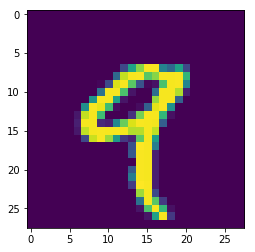

In [37]:
plt.imshow(train_images[4])

In [56]:
x_train = train_images.reshape(60000, 784)
x_test = test_images.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = train_labels
y_test = test_labels

In [57]:
y_train[0]

5

In [58]:
batch_size = 128
num_classes = 10
epochs = 20
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [59]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [60]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [61]:
print(x_test.shape, y_test.shape)

(10000, 784) (10000, 10)


In [62]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2631 - acc: 0.9211 - val_loss: 0.1021 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1092 - acc: 0.9673 - val_loss: 0.0876 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0798 - acc: 0.9760 - val_loss: 0.0759 - val_acc: 0.9789
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0630 - acc: 0.9813 - val_loss: 0.0711 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0816 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0465 - acc: 0.9861 - val_loss: 0.0683 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0392 - acc: 0.9881 - val_loss: 0.0762 - val_acc

In [53]:
def flush_predictons(predictions):
    imgs = pd.Series(range(1,pred_test.shape[0]+1))
    imgd = pd.DataFrame(imgs)
    
    labeld = pd.DataFrame(predictions)
    out = pd.concat([imgd, labeld],axis=1)
    out.columns = ["ImageId", "Label"]
    out.to_csv("KNN_Prediction.csv", index = False)

flush_predictons(predictions_cross);

NameError: name 'predictions_cross' is not defined